In [1]:
!pip install staintools

    100% |████████████████████████████████| 1.9MB 16.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/03/44/0c/aadfe7dfaa9083b211f490e671bbf9a26e6e9ce21ef21fc21f
  Stored in directory: /root/.cache/pip/wheels/76/a6/a8/5959872693a82d5497a91aee3665bb1676cee33304d86c1495
Successfully built staintools spams


In [0]:
import numpy as np 
import pandas as pd 
import os
import glob
import cv2
import random
import matplotlib.pyplot as plt
import staintools

np.random.seed(1)

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [5]:
!ls

kaggle.json  sample_data


In [0]:
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d hasibzunair/malaria

 99% 808M/815M [00:07<00:00, 128MB/s]
100% 815M/815M [00:07<00:00, 112MB/s]


In [8]:
os.listdir()

['.config', 'malaria.zip', 'kaggle.json', 'sample_data']

In [9]:
!unzip 'malaria.zip'

Archive:  malaria.zip
  inflating: y_test.npy              
  inflating: x_test.npy              
  inflating: y_train.npy             
  inflating: y_val.npy               
  inflating: x_train.npy             
  inflating: x_val.npy               


In [10]:
!ls

kaggle.json  sample_data  x_train.npy  y_test.npy   y_val.npy
malaria.zip  x_test.npy   x_val.npy    y_train.npy


In [11]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_train.shape, y_train.shape

((22046, 200, 200, 3), (22046, 2))

In [0]:
x_val = np.load("x_val.npy")
y_val = np.load("y_val.npy")
x_val.shape, y_val.shape

((2756, 200, 200, 3), (2756, 2))

In [0]:
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")
x_test.shape, y_test.shape

((2756, 200, 200, 3), (2756, 2))

In [0]:
def pad_image_for_square( img ):
    (rows, cols, dim) = img.shape
    resize_dim = max( rows, cols)
    pad_row = resize_dim - rows
    pad_col = resize_dim - cols
    img = np.pad(img, ((0,pad_row), (0, pad_col), (0,0)), 'constant', constant_values=0)
    return img

5727
[1. 0.]


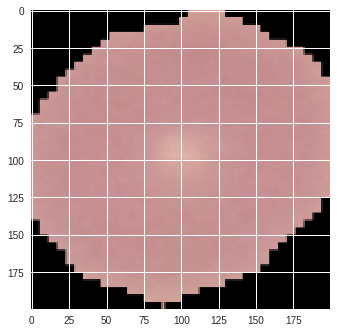

In [17]:
idx = random.randint(0, len(x_train))

plt.imshow(x_train[idx])
print(idx)
print(y_train[idx])

In [18]:
print(x_train.shape, y_train.shape)
print(x_val.shape, x_test.shape, y_val.shape, y_test.shape)

(22046, 200, 200, 3) (22046, 2)


NameError: ignored

In [25]:
idx = random.randint(0, len(x_train))

# random image from training set
x = idx
img = x_train[x]
img_transform = x_train[x]

idx, y_train[idx], img.shape, img_transform.shape

(11524, array([1., 0.], dtype=float32), (200, 200, 3), (200, 200, 3))

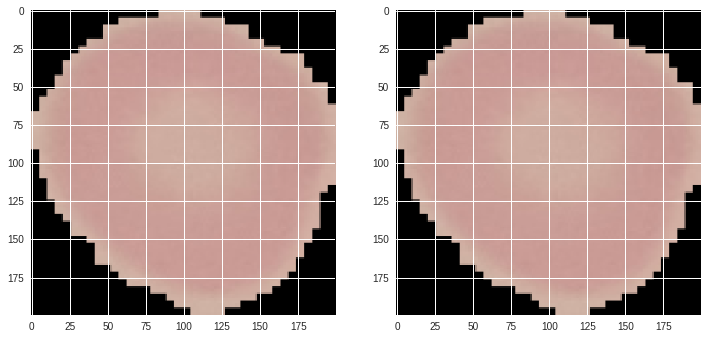

In [26]:
# plot it
fig=plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(1,2,1)

ax1.imshow(np.squeeze(img))
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.squeeze(img_transform))

In [27]:
# Read data
#target = staintools.read_image("./data/my_target_image.png")
#to_transform = staintools.read_image("./data/my_image_to_transform.png")


# here, both are same image
target = img
to_transform = img_transform

# Standardize brightness (This step is optional but can improve the tissue mask calculation)
target = staintools.LuminosityStandardizer.standardize(target)
to_transform = staintools.LuminosityStandardizer.standardize(to_transform)

# Stain normalize
normalizer = staintools.StainNormalizer(method='vahadane')
normalizer.fit(target)
transformed = normalizer.transform(to_transform)
transformed.shape

(200, 200, 3)

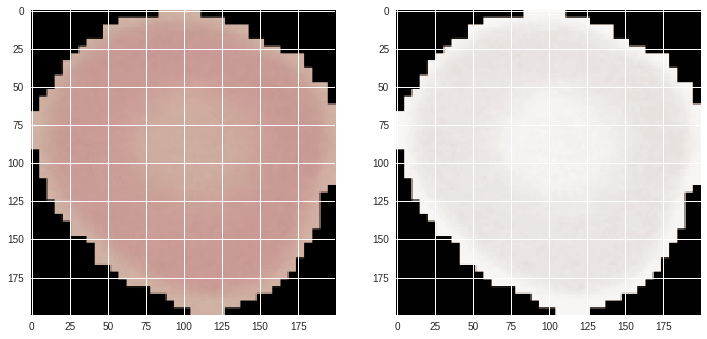

In [28]:
fig=plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(1,2,1)

ax1.imshow(np.squeeze(img))
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.squeeze(transformed))

In [0]:
def stain_tf(img):
  target = staintools.LuminosityStandardizer.standardize(img)
  to_transform = staintools.LuminosityStandardizer.standardize(img)

  # Stain normalize
  normalizer = staintools.StainNormalizer(method='vahadane')
  normalizer.fit(target)
  transformed = normalizer.transform(to_transform)
  return transformed


def stain_normalize_all(features):
  features_tf = np.array([stain_tf(img) for img in features])
  return features_tf

In [0]:
stain_normalize(44)

In [0]:
def stain_normalize(img):
  
  '''Return the image with the stain removed, probably...'''
  
  # here, both are same image
  target = img
  to_transform = img

  # Standardize brightness (This step is optional but can improve the tissue mask calculation)
  target = staintools.LuminosityStandardizer.standardize(target)
  to_transform = staintools.LuminosityStandardizer.standardize(to_transform)

  # Stain normalize
  normalizer = staintools.StainNormalizer(method='vahadane')
  normalizer.fit(target)
  transformed = normalizer.transform(to_transform)
  return transformed

5357
[0. 1.]


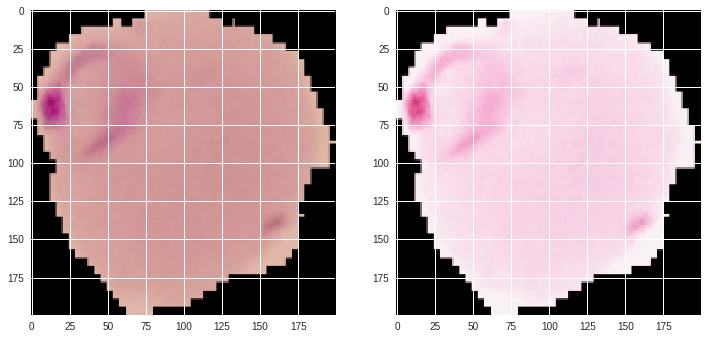

In [50]:
idx = random.randint(0, len(x_train))
print(idx)
print(y_train[idx])


img = x_train[idx]
img_stained = stain_normalize(img)


fig=plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(1,2,1)

ax1.imshow(np.squeeze(img))
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.squeeze(img_stained))

In [52]:
img[50:60, 50:60]

array([[[210, 149, 156],
        [208, 147, 154],
        [207, 145, 153],
        [207, 144, 153],
        [205, 142, 151],
        [207, 141, 153],
        [207, 141, 153],
        [206, 140, 152],
        [205, 137, 152],
        [204, 136, 151]],

       [[209, 148, 155],
        [210, 150, 157],
        [208, 146, 154],
        [206, 143, 152],
        [207, 144, 153],
        [207, 141, 153],
        [207, 140, 152],
        [206, 140, 152],
        [205, 137, 152],
        [203, 135, 150]],

       [[208, 147, 154],
        [210, 149, 156],
        [208, 146, 154],
        [207, 144, 153],
        [207, 144, 153],
        [207, 142, 153],
        [207, 141, 153],
        [206, 140, 152],
        [204, 136, 151],
        [203, 135, 150]],

       [[208, 147, 154],
        [208, 147, 154],
        [207, 145, 153],
        [207, 144, 153],
        [207, 144, 152],
        [207, 141, 152],
        [206, 140, 152],
        [205, 138, 151],
        [203, 135, 150],
        [202, 133, 

In [53]:
img_stained[50:60, 50:60]

array([[[249, 211, 231],
        [248, 206, 228],
        [249, 204, 227],
        [249, 204, 227],
        [248, 200, 225],
        [248, 200, 225],
        [248, 200, 225],
        [248, 198, 224],
        [248, 195, 222],
        [247, 193, 221]],

       [[249, 210, 230],
        [250, 212, 231],
        [249, 206, 228],
        [249, 201, 226],
        [249, 204, 227],
        [248, 200, 225],
        [248, 198, 224],
        [248, 198, 224],
        [248, 195, 222],
        [247, 191, 220]],

       [[248, 206, 228],
        [249, 211, 231],
        [249, 206, 228],
        [249, 204, 227],
        [249, 204, 227],
        [249, 202, 226],
        [248, 200, 225],
        [248, 198, 224],
        [247, 193, 221],
        [247, 191, 220]],

       [[248, 206, 228],
        [248, 206, 228],
        [249, 204, 227],
        [249, 204, 227],
        [249, 204, 227],
        [248, 200, 225],
        [248, 198, 224],
        [248, 196, 222],
        [247, 191, 220],
        [247, 190, 